<a href="https://colab.research.google.com/github/muhamadfajarr-hub/coba1/blob/main/Analisis_big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import  seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Semester 7/Analisis big data/anonymisedData

/content/drive/MyDrive/Semester 7/Analisis big data/anonymisedData


**ASSESSMENTS**

In [4]:
d1 = pd.read_csv('assessments.csv')
d1

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [58]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        195 non-null    object 
 1   code_presentation  195 non-null    object 
 2   id_assessment      195 non-null    int64  
 3   assessment_type    195 non-null    object 
 4   date               195 non-null    float64
 5   weight             195 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 10.7+ KB


In [12]:
#Deskripsi statistik dari data
d1.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [14]:
# mengecek apakah data tersebut memiliki null
print(d1.isnull().sum())

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64


In [15]:
#Menghilangkan Missing value pada data Assessment
d1 = d1.dropna()
d1.isna().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64

In [16]:
#Mengecek nilai duplikat pada data
d1.duplicated().sum()

0

In [ ]:
for col in d1.columns :
  print(col)
  print(d1[col].unique())
  print("panjang : ",len(d1[col].unique()), "\n")

Menjadikan assesment_type menjadi target class karena pada  assessment_type  sudah digolongan  menjadi 3 type assessment untuk mahasiswa TMA,CMA,Exam

<Axes: xlabel='assessment_type', ylabel='count'>

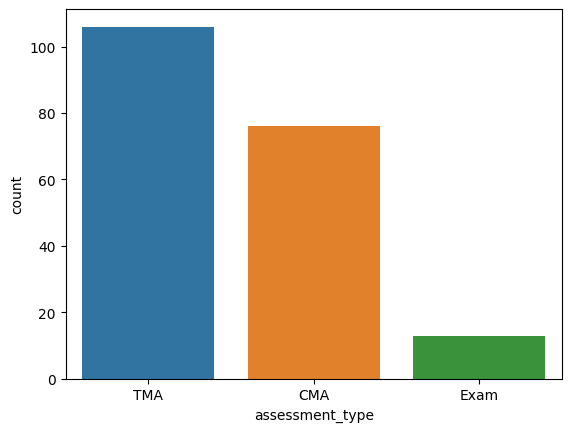

In [57]:
#memjadikan assesment_type menjadi target clas pada data assessment
sns.countplot(x=d1['assessment_type'])

**COURSES**

In [5]:
#Membaca data courses
d2 = pd.read_csv('courses.csv')
d2

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [21]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [23]:
#Deskripsi statistik dari data
d2.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


In [24]:
# mengecek apakah data tersebut memiliki null
print(d2.isnull().sum())

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64


In [25]:
#melakukan pengecekan nilai duplikat,apakah data courses memiliki nilai duplikat
#Setelah melakukan pengecekan data tersebut tidak memiliki missing value dan nilai  duplicate
d2.duplicated().sum()

0

In [28]:
for col in d2.columns :
  print(col)
  print(d2[col].unique())
  print("panjang : ",len(d2[col].unique()), "\n")

code_module
['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
panjang :  7 

code_presentation
['2013J' '2014J' '2013B' '2014B']
panjang :  4 

module_presentation_length
[268 269 262 240 234 241 261]
panjang :  7 



<Axes: xlabel='module_presentation_length', ylabel='count'>

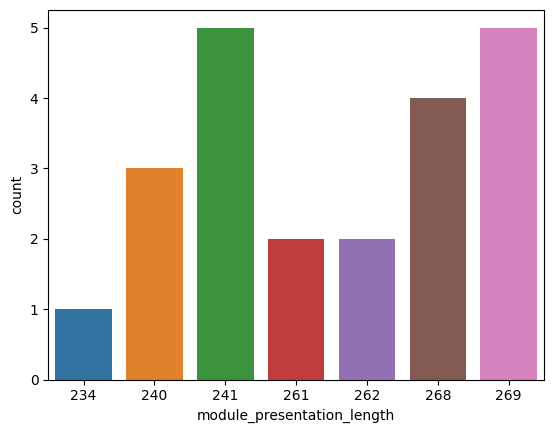

In [26]:
sns.countplot(x=d2['module_presentation_length'])

**STUDENT_ASSESSMENT**

In [6]:
d3 = pd.read_csv('studentAssessment.csv')
d3

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [29]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [30]:
for col in d3.columns :
  print(col)
  print(d3[col].unique())
  print("panjang : ",len(d3[col].unique()), "\n")

id_assessment
[ 1752  1753  1754  1755  1756  1758  1759  1760  1761  1762 14984 14985
 14986 14987 14988 14989 14991 14992 14993 14994 14995 14996 14997 14998
 14999 15000 15001 15003 15004 15005 15006 15007 15008 15009 15010 15011
 15012 15013 15015 15016 15017 15018 15019 15020 15021 15022 15023 15024
 24282 24283 24284 24285 24286 24287 24288 24289 24290 24291 24292 24293
 24294 24295 24296 24297 24298 24299 25334 25335 25336 25337 25338 25339
 25340 25341 25342 25343 25344 25345 25346 25347 25348 25349 25350 25351
 25352 25353 25354 25355 25356 25357 25358 25359 25360 25361 25362 25363
 25364 25365 25366 25367 25368 30709 30710 30711 30712 30714 30715 30716
 30717 30719 30720 30721 30722 34860 34861 34862 34863 34864 34865 34866
 34867 34868 34869 34870 34871 34873 34874 34875 34876 34877 34878 34879
 34880 34881 34882 34883 34884 34886 34887 34888 34889 34890 34891 34892
 34893 34894 34895 34896 34897 34899 34900 34901 34902 34903 34904 34905
 34906 34907 34908 34909 34910 37415 

In [31]:
# mengecek apakah data tersebut memiliki null
print(d3.isnull().sum())

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64


In [32]:
# merupakan pengghilang null di dalam data
for col in d3.columns:
    mode_value = d3[col].mode()[0]
    d3[col].fillna(mode_value, inplace=True)
print(d3.isnull().sum())

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64


In [34]:
d3.duplicated().sum()

0

STUDENT_INFO

In [7]:
d4 = pd.read_csv('studentInfo.csv')
d4

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [35]:
d4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [36]:
for col in d3.columns :
  print(col)
  print(d3[col].unique())
  print("panjang : ",len(d3[col].unique()), "\n")

id_assessment
[ 1752  1753  1754  1755  1756  1758  1759  1760  1761  1762 14984 14985
 14986 14987 14988 14989 14991 14992 14993 14994 14995 14996 14997 14998
 14999 15000 15001 15003 15004 15005 15006 15007 15008 15009 15010 15011
 15012 15013 15015 15016 15017 15018 15019 15020 15021 15022 15023 15024
 24282 24283 24284 24285 24286 24287 24288 24289 24290 24291 24292 24293
 24294 24295 24296 24297 24298 24299 25334 25335 25336 25337 25338 25339
 25340 25341 25342 25343 25344 25345 25346 25347 25348 25349 25350 25351
 25352 25353 25354 25355 25356 25357 25358 25359 25360 25361 25362 25363
 25364 25365 25366 25367 25368 30709 30710 30711 30712 30714 30715 30716
 30717 30719 30720 30721 30722 34860 34861 34862 34863 34864 34865 34866
 34867 34868 34869 34870 34871 34873 34874 34875 34876 34877 34878 34879
 34880 34881 34882 34883 34884 34886 34887 34888 34889 34890 34891 34892
 34893 34894 34895 34896 34897 34899 34900 34901 34902 34903 34904 34905
 34906 34907 34908 34909 34910 37415 

In [37]:
# mengecek apakah data tersebut memiliki null
print(d4.isnull().sum())

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64


In [38]:
# merupakan pengghilang null di dalam data
for col in d4.columns:
    mode_value = d4[col].mode()[0]
    d4[col].fillna(mode_value, inplace=True)
print(d4.isnull().sum())

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64


In [39]:
d4.duplicated().sum()

0

**STUDENT_REGISTRATION**

In [8]:
d5 = pd.read_csv('studentRegistration.csv')
d5

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [40]:
d5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [41]:
for col in d5.columns :
  print(col)
  print(d5[col].unique())
  print("panjang : ",len(d5[col].unique()), "\n")

code_module
['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
panjang :  7 

code_presentation
['2013J' '2014J' '2013B' '2014B']
panjang :  4 

id_student
[  11391   28400   30268 ... 2648187 2679821 2684003]
panjang :  28785 

date_registration
[-159.  -53.  -92.  -52. -176. -110.  -67.  -29.  -33. -179. -103.  -47.
  -59.  -68. -180.  -95. -130.  -50. -107.  -27.  -31. -170.  -62. -100.
 -109.    5.  -43.  -26.  -32.  -99.  -82. -197.  -75.  -96. -195.  -61.
  -37.  -36. -132. -138. -174.  -44.  -16.  -54.  -64.  -46. -117.  -45.
 -162.  -57.  -39. -128.  -74.  -12. -136.  -73.  -51. -169. -172. -108.
 -165.  -58.  -79.    2. -151. -198. -186. -145. -191.  -17.   -8. -141.
  -80. -115.  -83.  -18.  -66. -123. -121. -192. -196.   48.  -71.  -81.
  -60.  -49.  -38. -129.   -4.  -19.  -87. -155. -185.  -23.  -15. -120.
 -156. -127.  -30. -158.  -22.  -91.  -42. -144.  -63.  -35.   20. -102.
 -124. -106. -164. -137.  -65. -148. -113. -116.  -28.  -85.  -56. -101.
  -24.  -94.  -11. -105. -153.

In [42]:
# mengecek apakah data tersebut memiliki null
print(d5.isnull().sum())

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64


In [43]:
# merupakan pengghilang null di dalam data
for col in d5.columns:
    mode_value = d5[col].mode()[0]
    d5[col].fillna(mode_value, inplace=True)
print(d5.isnull().sum())

code_module            0
code_presentation      0
id_student             0
date_registration      0
date_unregistration    0
dtype: int64


In [45]:
d5.duplicated().sum()

0

**STUDENT_VLE**

In [9]:
d6 = pd.read_csv('studentVle.csv')
d6

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [46]:
d6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [47]:
for col in d6.columns :
  print(col)
  print(d6[col].unique())
  print("panjang : ",len(d6[col].unique()), "\n")

code_module
['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
panjang :  7 

code_presentation
['2013J' '2014J' '2013B' '2014B']
panjang :  4 

id_student
[ 28400  30268  31604 ... 676034 121182 650630]
panjang :  26074 

id_site
[546652 546614 546714 ... 896948 896952 896969]
panjang :  6268 

date
[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43
  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163

In [48]:
# mengecek apakah data tersebut memiliki null
print(d6.isnull().sum())

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64


In [50]:
d6.duplicated().sum()

787170

**VLE**

In [10]:
d7 = pd.read_csv('vle.csv')
d7

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [49]:
d7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [51]:
for col in d7.columns :
  print(col)
  print(d7[col].unique())
  print("panjang : ",len(d7[col].unique()), "\n")

id_site
[546943 546712 546998 ... 896965 897060 897100]
panjang :  6364 

code_module
['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
panjang :  7 

code_presentation
['2013J' '2014J' '2013B' '2014B']
panjang :  4 

activity_type
['resource' 'oucontent' 'url' 'homepage' 'subpage' 'glossary' 'forumng'
 'oucollaborate' 'dataplus' 'quiz' 'ouelluminate' 'sharedsubpage'
 'questionnaire' 'page' 'externalquiz' 'ouwiki' 'dualpane'
 'repeatactivity' 'folder' 'htmlactivity']
panjang :  20 

week_from
[nan  2.  1.  9. 11. 22.  6.  8. 19.  4. 15. 14. 25. 20. 27. 16. 24.  3.
 21. 18. 26. 10.  5. 28. 23. 13. 12.  7. 17.  0. 29.]
panjang :  31 

week_to
[nan  2.  1.  9. 11. 22.  6.  8. 19.  4. 15. 14. 25. 20. 27. 16. 24.  3.
 21. 18. 26. 10.  5. 28. 23. 13. 12.  7. 17.  0. 29.]
panjang :  31 



In [52]:
d7.duplicated().sum()

0

In [53]:
# mengecek apakah data tersebut memiliki null
print(d7.isnull().sum())

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64
